# TP1 PROBA : NOTEBOOK DE TEST DES GENERATEURS ALEATOIRES

Ce TP a pour objectif de nous introduire dans un premier temps à la génération de nombre aléeatoire et surtout aux outils statistiques nous permettant d'évaluer la qualité de cette génération.

Le rapport de ce TP est sous forme de notebook python3 permettant de simplifier la rédaction du rapport et de mieux lier l'éxecutable au rapport (il suffit de réexecuter le notebook pour visualiser les résultats pour une autre execution).

In [20]:
import ResultAnalysis as ra
from ggplot import *
import numpy as np
import pandas as pd
import subprocess
%matplotlib inline

path = '..\\'

Le programme C du TP génère 1024 valeurs aléatoires pour chaque générateur aléatoires (AES, Rand(), Von Neumann et Mersenne-Twister) qui sont enregistrées dans des fichiers csv. Il effectue également le test de fréquence monobit et des runs puis enregistre les résultats (p-valeurs obtenues pour chaque générateurs) dans un fichier CSV.

Executons le programme :

In [71]:
# Run C random value generators
from io import StringIO
p = subprocess.Popen(path + 'RandomGenerators\\simul.exe', stdin=subprocess.PIPE, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
output, err = p.communicate()
print(output.decode("utf-8"))

Temps d'execution du calcul de 3000 valeurs de la distribution f (inversion): 3001 us
Temps d'execution du calcul de 3000 valeurs de la distribution f (rejet): 19001 us



Le programme affiche en sortie standard le temps d'execution de 3000 executions de deux fonctions simulant la distribution d'une même fonction f par deux méthodes différentes : par inversion et par rejet.

On constate que l'inversion donne un résultat plus rappide mais elle est plus difficile à mettre en place pour une distribution quelconque puisqu'il faut connaitre la fonction inverse.

## Visualisation des valeures générée par Rand()

TODO: expliquer

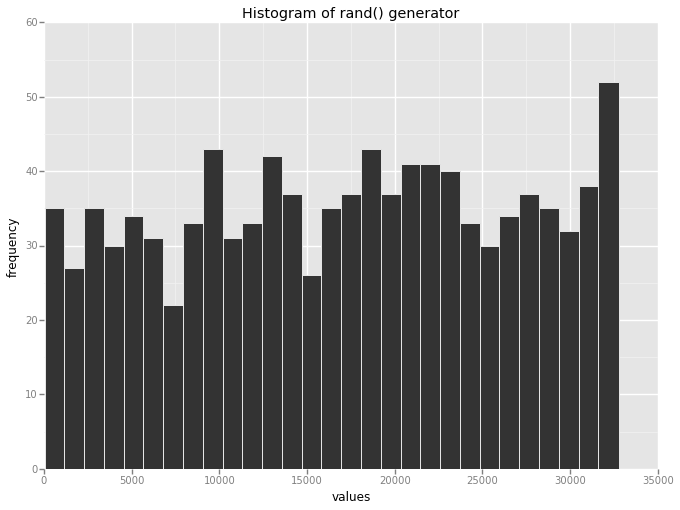

<ggplot: (14327319)>


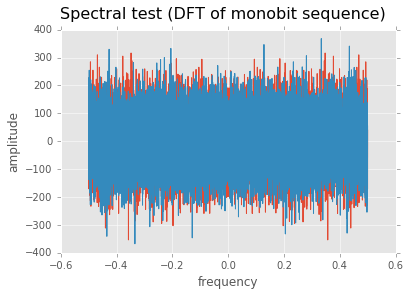

In [13]:
# Plot Histogram of rand() generator
data_rand = pd.read_csv(path + '_rand.csv', quoting=2)
print(ggplot(aes(x='values'), data=data_rand) + geom_histogram(binwidth = ra.width(data_rand, 30)) \
        + ggtitle("Histogram of rand() generator") + labs("values", "frequency"))
# Plot FFT of bit sequence from rand() generator
ra.plot_bit_sequence_fft(data_rand['values'], 15)

### Visualisation des valeures générée pour les 4 bits de poids fort de rand()

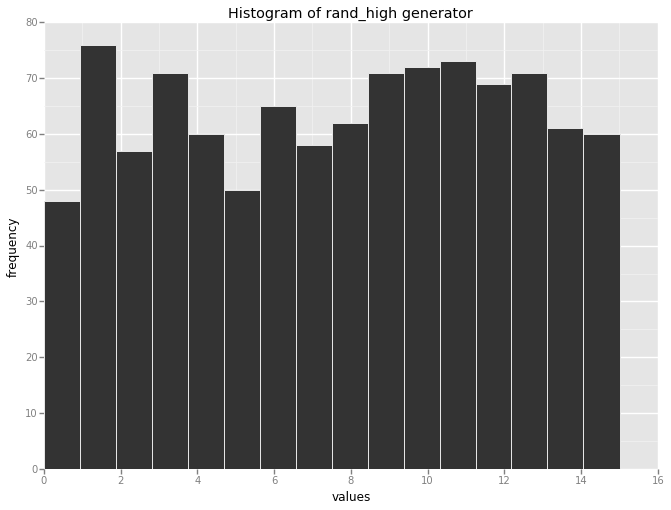

<ggplot: (14369457)>


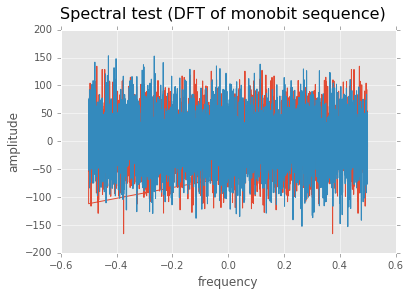

In [14]:
# Plot Histogram of rand_high generator
data_rand_high = pd.read_csv(path + '_rand_high.csv', quoting=2)
print(ggplot(aes(x='values'), data=data_rand_high) + geom_histogram(binwidth = ra.width(data_rand_high, 16)) \
        + ggtitle("Histogram of rand_high generator") + labs("values", "frequency"))
# Plot FFT of bit sequence from rand_high generator
ra.plot_bit_sequence_fft(data_rand_high['values'], 4)

### Visualisation des valeures générée pour les 4 bits de poids faible de rand()

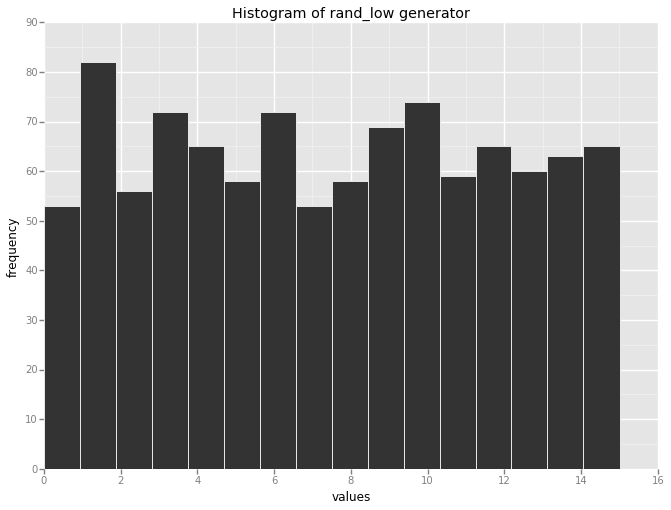

<ggplot: (14350383)>


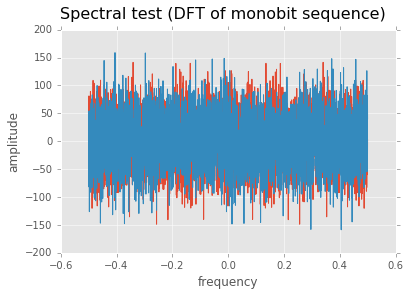

In [15]:
# Plot Histogram of rand_low generator
data_rand_low = pd.read_csv(path + '_rand_low.csv', quoting=2)
print(ggplot(aes(x='values'), data=data_rand_low) + geom_histogram(binwidth = ra.width(data_rand_low, 16)) \
      + ggtitle("Histogram of rand_low generator") + labs("values", "frequency"))
# Plot FFT of bit sequence from rand_low generators
ra.plot_bit_sequence_fft(data_rand_low['values'], 4)

## Visualisation des valeures générée par la méthode AES

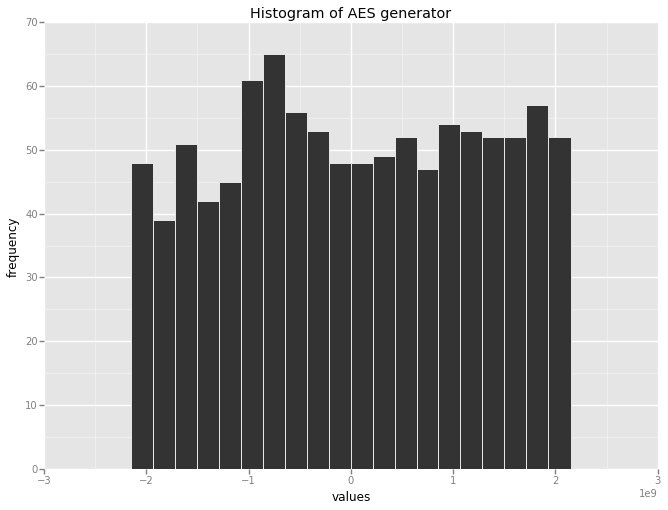

<ggplot: (14344559)>


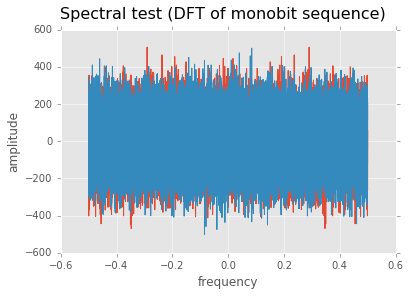

In [16]:
# Plot Histogram of AES generator
data_aes = pd.read_csv(path + '_aes.csv', quoting=2)
print(ggplot(aes(x='values'), data=data_aes) + geom_histogram(binwidth = ra.width(data_aes, 20)) \
      + ggtitle("Histogram of AES generator") + labs("values", "frequency"))
# Plot FFT of bit sequence from AES generator
ra.plot_bit_sequence_fft(data_aes['values'], 31)

## Visualisation des valeures générée par la méthode de  Mersenne-Twister

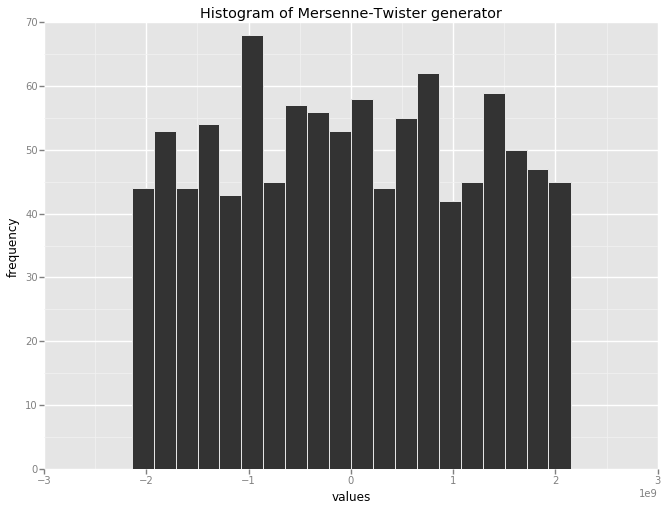

<ggplot: (14416917)>


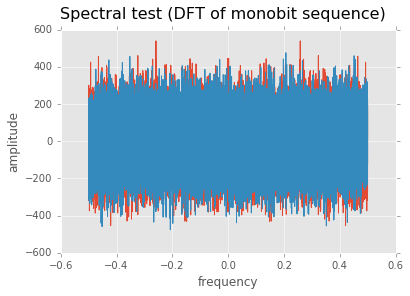

In [17]:
# Plot Histogram of Mersenne-Twister generator
data_twister = pd.read_csv(path + '_twister.csv', quoting=2)
print(ggplot(aes(x='values'), data=data_twister) + geom_histogram(binwidth = ra.width(data_twister, 20)) \
      + ggtitle("Histogram of Mersenne-Twister generator") + labs("values", "frequency"))
# Plot FFT of bit sequence from Mersenne-Twister generator
ra.plot_bit_sequence_fft(data_twister['values'], 31)

## Visualisation des valeures générée par la méthode de Von Neumann

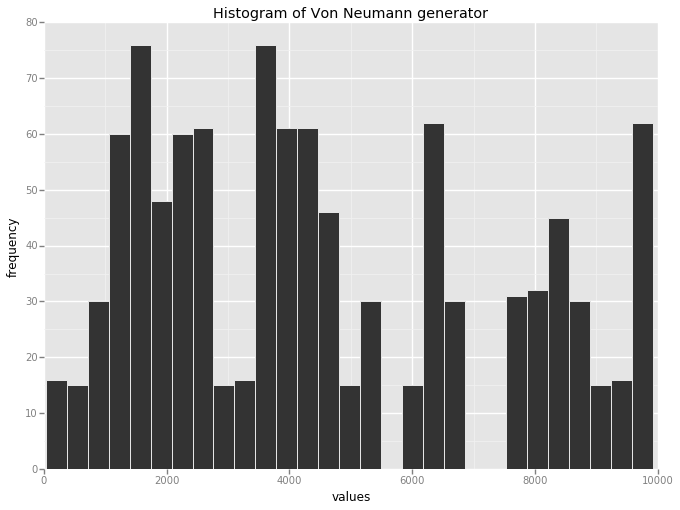

<ggplot: (14558301)>


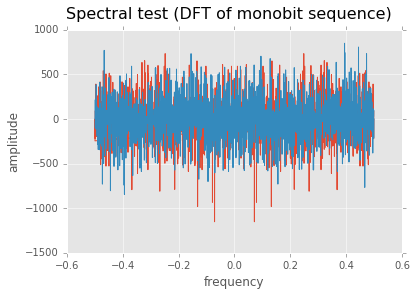

In [19]:
# Plot Histogram of Von Neumann generator
data_neumann = pd.read_csv(path + '_von_neumann.csv', quoting=2)
print(ggplot(aes(x='values'), data=data_neumann) + geom_histogram(binwidth = ra.width(data_neumann, 30)) \
      + ggtitle("Histogram of Von Neumann generator") + labs("values", "frequency"))
# Plot FFT of bit sequence from Von Neumann generator
ra.plot_bit_sequence_fft(data_neumann['values'], 14)

On constate que ce générateur de valeurs alétoires n'est pas trés efficace par rappport aux précédents. La transformée de fourier discrete de la séquence de bits générée est assez irrégulière et l'histogramme montre bien que la répartition des valeures aléatoire sur l'interval [0;10000] n'est pas uniforme.

## Résultats des tests de runs et de fréquence monobit

In [68]:
# Lecture des résultats des tests sur les générateurs aléatoires
tests_results = pd.read_csv(path + '_test_results.csv', quoting=2)
tests_results['index'] = list(range(len(tests_results.index)))
tests_results = tests_results.reset_index()
tests_results.columns = ['generator', 'Monobit p-value', 'frequency', 'Runs p-value', 'index']

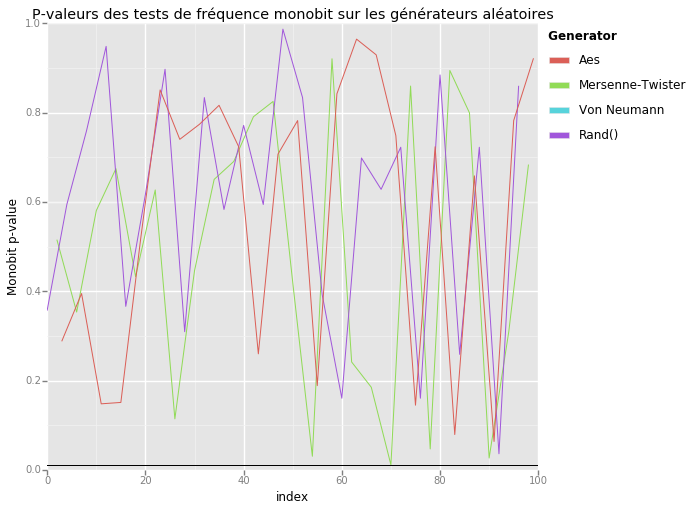

<ggplot: (14414025)>

In [70]:
# Affichage de la P-valeur pour le test des fréquence monobit (la ligne noire horizontale indique la limite des 0.01)
ggplot(tests_results, aes(x='index', y='Monobit p-value', color='generator')) + geom_line() \
    + geom_abline(intercept=0.01, slope= 0, color="black") \
    + ggtitle("P-valeurs des tests de fréquence monobit sur les générateurs aléatoires")

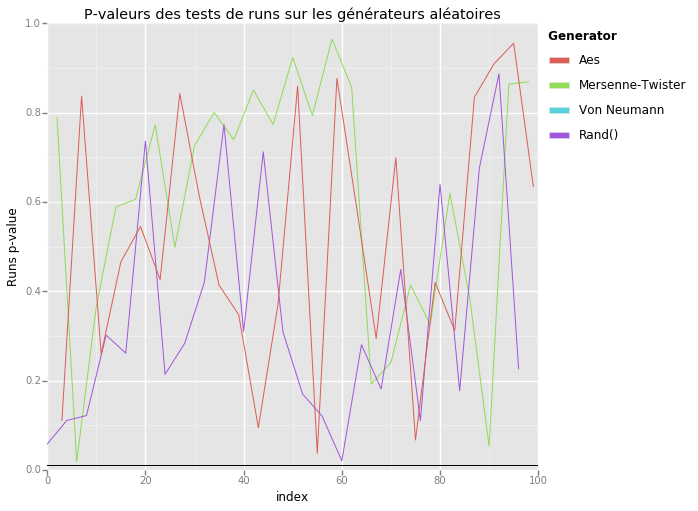

<ggplot: (14427489)>

In [73]:
# Affichage de la P-valeur pour le test des runs (la ligne noire horizontale indique la limite des 0.01)
ggplot(tests_results, aes(x='index', y='Runs p-value', color='generator')) + geom_line() \
    + geom_abline(intercept=0.01, slope= 0, color="black") \
    + ggtitle("P-valeurs des tests de runs sur les générateurs aléatoires")

On constate que tout les générateurs alétoires sont au dessus de la barre des 0.01 mis à part Von Neumann (sa p-valeur est toujours à 0) pour les deux tests